<a href="https://colab.research.google.com/github/IrvingLHernandez/Terravision.github.io/blob/main/Face_Mask_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/My Drive/Colab Notebooks/dataset.zip' .

In [3]:
from zipfile import ZipFile
dataset_zip = '/content/dataset.zip'



In [4]:
with ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

    print('The dataset is extracted')


The dataset is extracted


In [5]:
!ls

dataset  dataset.zip  drive  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/dataset/data/with_mask')
without_mask_files = os.listdir('/content/dataset/data/without_mask')

In [8]:
print('Number of with Mask images ', len(with_mask_files))
print('Number of without Mask images ', len(without_mask_files))

Number of with Mask images  3725
Number of without Mask images  3828


In [9]:
#Creatinh labels for the two class of images
#With Mask --> 1
#without Mask --> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print (with_mask_labels[0:5])
print (without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
labels = with_mask_labels + without_mask_labels
print (labels[0:5])
print (labels[-5:])
print(len(labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


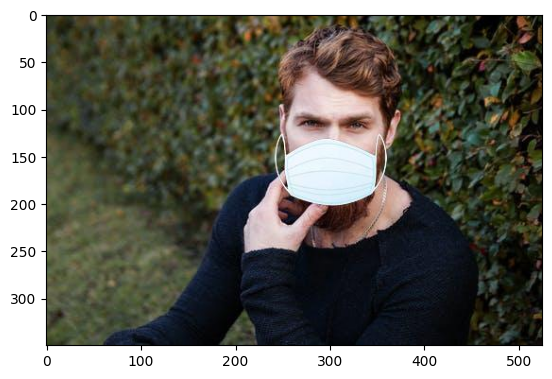

In [12]:
#Displayin with mask images
img = mpimg.imread('/content/dataset/data/with_mask/with_mask_1.jpg')
# Afficher l'image
plt.imshow(img)
#plt.axis('off')  # Ne pas afficher les axes
plt.show()

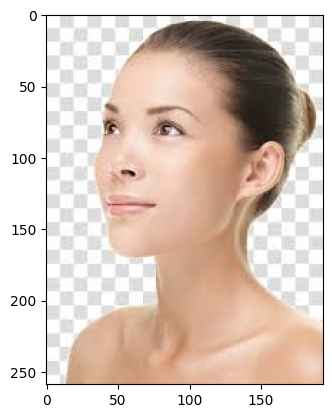

In [13]:
#Displayin without mask images
img = mpimg.imread('/content/dataset/data/without_mask/without_mask_2925.jpg')
# Afficher l'image
plt.imshow(img)
#plt.axis('off')  # Ne pas afficher les axes
plt.show()

In [14]:
#Image Processing
#--> Resize Images
#--> Convert images to a numpy arrays

with_mask_path = '/content/dataset/data/with_mask/'
data=[]

for img_file in with_mask_files :
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/dataset/data/without_mask/'

for img_file in without_mask_files :
  image =  Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(data)

7553

In [16]:
type(data)

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
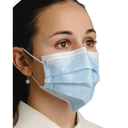

In [17]:
data[0]


In [18]:
type(data[0])

numpy.ndarray

In [19]:
#Converting image list & label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape , X_train.shape , X_test.shape )

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [21]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [22]:
#Building the CNN

import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_class = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3) , activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3) , activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class, activation='sigmoid'))


In [24]:
#complile the NN

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [25]:
#Training the NN

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 130s 757ms/step - loss: 0.4262 - acc: 0.8100 - val_loss: 0.2628 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 128s 752ms/step - loss: 0.2794 - acc: 0.8919 - val_loss: 0.2061 - val_acc: 0.9240
Epoch 3/5
170/170 [==============================] - 130s 767ms/step - loss: 0.2195 - acc: 0.9106 - val_loss: 0.2418 - val_acc: 0.8893
Epoch 4/5
170/170 [==============================] - 131s 769ms/step - loss: 0.1833 - acc: 0.9275 - val_loss: 0.1723 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 125s 736ms/step - loss: 0.1378 - acc: 0.9478 - val_loss: 0.1853 - val_acc: 0.9289


In [26]:
#Model Evaluation

loss, accuracy =  model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ' , accuracy)

48/48 [==============================] - 10s 217ms/step - loss: 0.1804 - acc: 0.9332
Test Accuracy =  0.9331568479537964


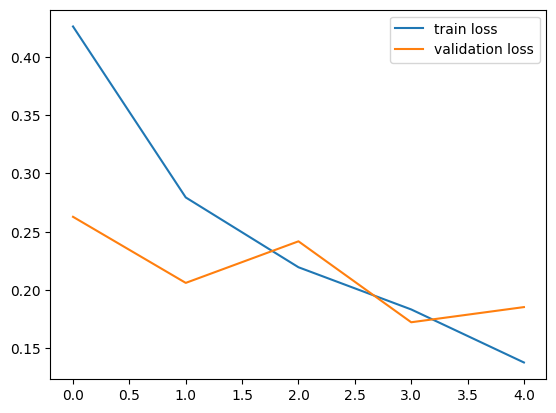

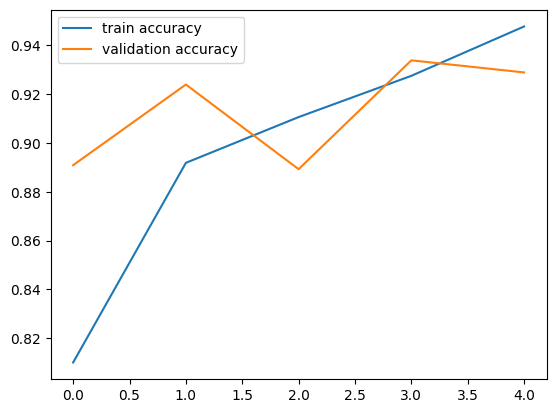

In [27]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


#plot the Accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

path of the image to be predicted : /content/test2.jpg


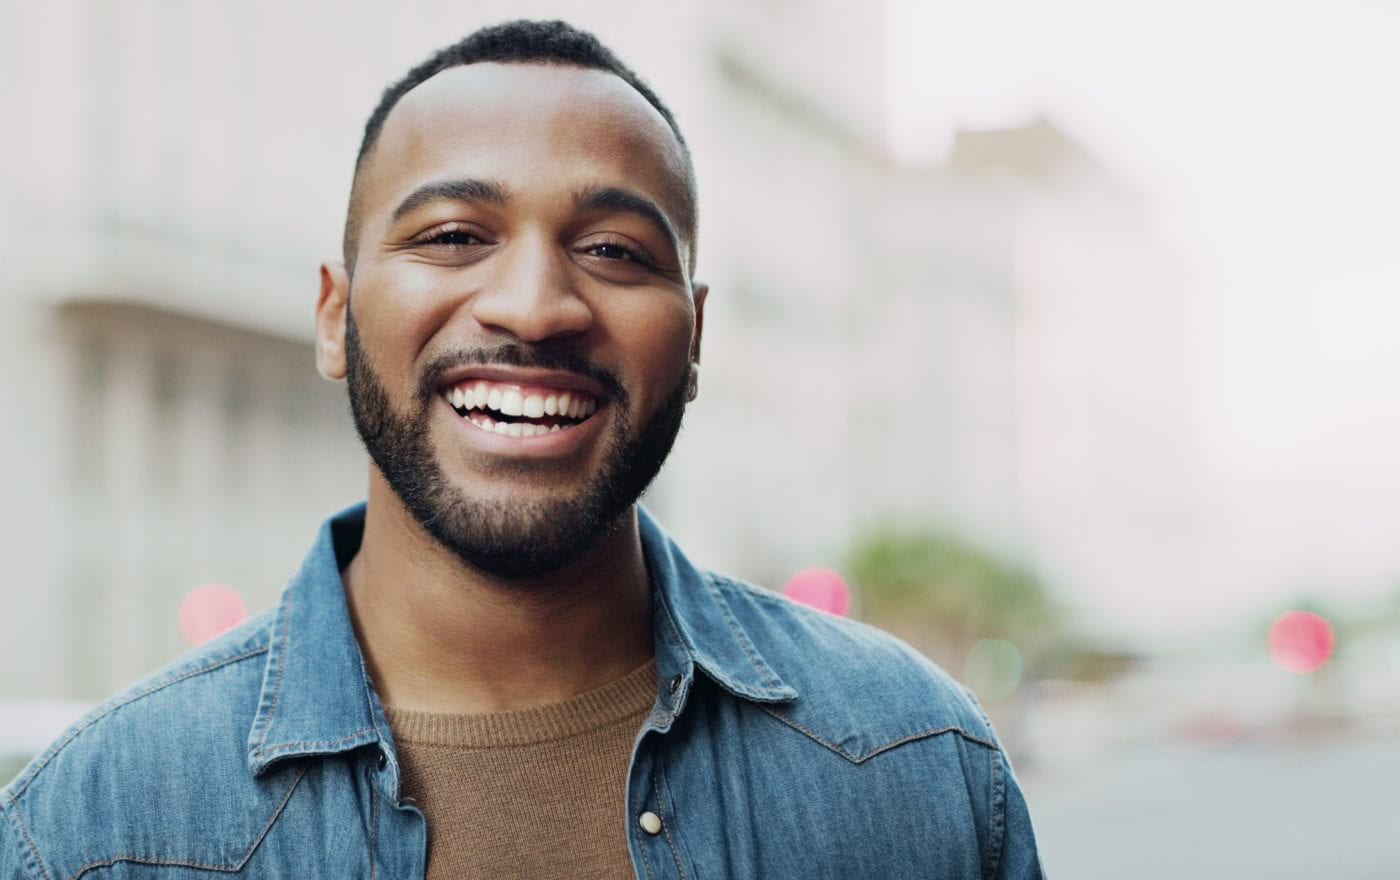

1/1 [==============================] - 0s 42ms/step
[[0.47171855 0.51771474]]
1
The person in the image is not wearing a Mask


In [30]:
#Predictive system

input_image_path = input('path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image , (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction =  model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label )

if input_pred_label  == 0:
  print('The person in the image is wearing a Mask')

else :
  print('The person in the image is not wearing a Mask')


path of the image to be predicted : /content/test.jpg


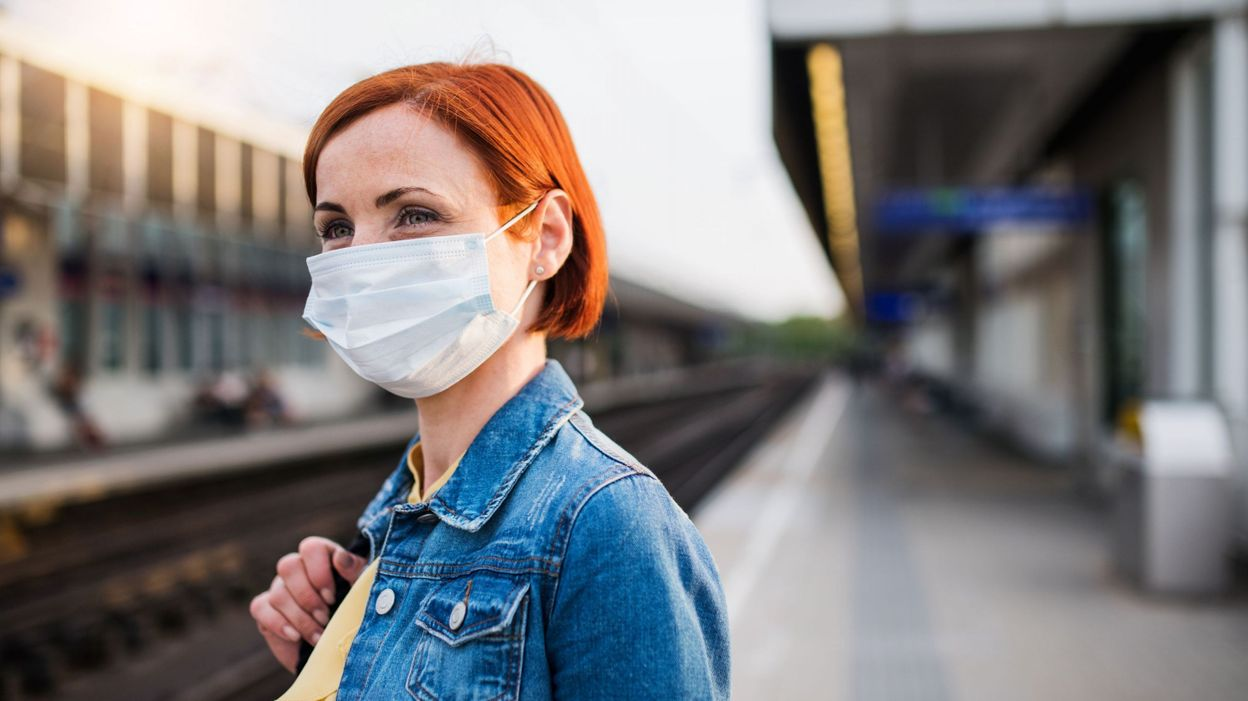

1/1 [==============================] - 0s 58ms/step
[[0.5268937  0.49213633]]
0
The person in the image is wearing a Mask


In [31]:
#Predictive system

input_image_path = input('path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image , (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
input_prediction =  model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label )

if input_pred_label  == 0:
  print('The person in the image is wearing a Mask')

else :
  print('The person in the image is not wearing a Mask')
